In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('NutritionalFacts.csv',encoding='latin-1')
print(data)

                                     Food and Serving  Calories  \
0                                                 NaN       NaN   
1                   Asparagus, 5 spears (93 g/3.3 oz)      20.0   
2                Bell Pepper, 1 medium (148 g/5.3 oz)      25.0   
3             Broccoli, 1 medium stalk (148 g/5.3 oz)      45.0   
4   Carrot, 1 carrot, 7" long,Ê1 1/4" diameter (78...      30.0   
..                                                ...       ...   
57                Scallops, about 6 large or 14 small     140.0   
58                                             Shrimp     100.0   
59                                          Swordfish     120.0   
60                                            Tilapia     110.0   
61                                               Tuna     130.0   

    CaloriesÊfrom Fat Total Fat Total Fat.1 Sodium Sodium.1 Potassium  \
0                 NaN       (g)       (%DV)    (g)    (%DV)       (g)   
1                 0.0         0           0      

In [4]:
data.dtypes

Food and Serving          object
Calories                 float64
CaloriesÊfrom Fat        float64
Total Fat                 object
Total Fat.1               object
Sodium                    object
Sodium.1                  object
Potassium                 object
Potassium.1               object
Total Carbo-hydrate       object
Total Carbo-hydrate.1     object
Dietary Fiber             object
Dietary Fiber.1           object
Sugars                    object
Protein                   object
Vitamin A                 object
Vitamin C                 object
Calcium                   object
ÊÊIronÊÊ                  object
Saturated Fat             object
Saturated Fat.1           object
Chole-sterol              object
Chole-sterol.1            object
Food Type                 object
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
cols = ['Food and Serving', 'Food Type']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,61,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg)Ê,(%DV),(mg)Ê,3
1,1,20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,2
2,4,25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,2
3,6,45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,2
4,8,30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,48,140.0,10.0,1,2,310,13,430,12,5,...,27,2,0,4,14,0,0,65,22,1
58,49,100.0,10.0,1.5,2,240,10,220,6,0,...,21,4,4,6,10,0,0,170,57,1
59,55,120.0,50.0,6,9,100,4,310,9,0,...,16,2,2,0,6,1.5,8,40,13,1
60,57,110.0,20.0,2.5,4,30,1,360,10,0,...,22,0,2,0,2,1,5,75,25,1


In [7]:
data.head()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,61,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg)Ê,(%DV),(mg)Ê,3
1,1,20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,2
2,4,25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,2
3,6,45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,2
4,8,30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,2


In [8]:
data.tail()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
57,48,140.0,10.0,1,2,310,13,430,12,5,...,27,2,0,4,14,0,0,65,22,1
58,49,100.0,10.0,1.5,2,240,10,220,6,0,...,21,4,4,6,10,0,0,170,57,1
59,55,120.0,50.0,6,9,100,4,310,9,0,...,16,2,2,0,6,1.5,8,40,13,1
60,57,110.0,20.0,2.5,4,30,1,360,10,0,...,22,0,2,0,2,1,5,75,25,1
61,59,130.0,15.0,1.5,2,40,2,480,14,0,...,26,2,2,2,4,0,0,50,17,1


In [9]:
print(data.shape)
print(data.describe())

(62, 24)
       Food and Serving    Calories  CaloriesÊfrom Fat  Food Type
count         62.000000   61.000000          61.000000  62.000000
mean          30.500000   72.540984           9.344262   1.032258
std           18.041619   43.690416          17.523209   0.848678
min            0.000000   10.000000           0.000000   0.000000
25%           15.250000   25.000000           0.000000   0.000000
50%           30.500000   80.000000           0.000000   1.000000
75%           45.750000  100.000000          10.000000   2.000000
max           61.000000  200.000000          90.000000   3.000000


In [10]:
data.dtypes

Food and Serving           int64
Calories                 float64
CaloriesÊfrom Fat        float64
Total Fat                 object
Total Fat.1               object
Sodium                    object
Sodium.1                  object
Potassium                 object
Potassium.1               object
Total Carbo-hydrate       object
Total Carbo-hydrate.1     object
Dietary Fiber             object
Dietary Fiber.1           object
Sugars                    object
Protein                   object
Vitamin A                 object
Vitamin C                 object
Calcium                   object
ÊÊIronÊÊ                  object
Saturated Fat             object
Saturated Fat.1           object
Chole-sterol              object
Chole-sterol.1            object
Food Type                  int64
dtype: object

In [11]:
data.isnull().sum()

Food and Serving          0
Calories                  1
CaloriesÊfrom Fat         1
Total Fat                 0
Total Fat.1               0
Sodium                    0
Sodium.1                  0
Potassium                 0
Potassium.1               0
Total Carbo-hydrate       0
Total Carbo-hydrate.1     0
Dietary Fiber            21
Dietary Fiber.1          21
Sugars                   21
Protein                   0
Vitamin A                 0
Vitamin C                 0
Calcium                   0
ÊÊIronÊÊ                  0
Saturated Fat            40
Saturated Fat.1          40
Chole-sterol             40
Chole-sterol.1           40
Food Type                 0
dtype: int64

In [12]:
data['Dietary Fiber'] = data['Dietary Fiber'].fillna(0)
data['Dietary Fiber.1'] = data['Dietary Fiber.1'].fillna(0)
data['Sugars'] = data['Sugars'].fillna(0)
data['Saturated Fat'] = data['Saturated Fat'].fillna(0)
data['Saturated Fat.1'] = data['Saturated Fat.1'].fillna(0)
data['Chole-sterol'] = data['Chole-sterol'].fillna(0)
data['Chole-sterol.1'] = data['Chole-sterol.1'].fillna(0)

In [13]:
data.isnull().sum()

Food and Serving         0
Calories                 1
CaloriesÊfrom Fat        1
Total Fat                0
Total Fat.1              0
Sodium                   0
Sodium.1                 0
Potassium                0
Potassium.1              0
Total Carbo-hydrate      0
Total Carbo-hydrate.1    0
Dietary Fiber            0
Dietary Fiber.1          0
Sugars                   0
Protein                  0
Vitamin A                0
Vitamin C                0
Calcium                  0
ÊÊIronÊÊ                 0
Saturated Fat            0
Saturated Fat.1          0
Chole-sterol             0
Chole-sterol.1           0
Food Type                0
dtype: int64

In [14]:
data

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,61,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg)Ê,(%DV),(mg)Ê,3
1,1,20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,0,0,0,0,2
2,4,25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,0,0,0,0,2
3,6,45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,0,0,0,0,2
4,8,30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,48,140.0,10.0,1,2,310,13,430,12,5,...,27,2,0,4,14,0,0,65,22,1
58,49,100.0,10.0,1.5,2,240,10,220,6,0,...,21,4,4,6,10,0,0,170,57,1
59,55,120.0,50.0,6,9,100,4,310,9,0,...,16,2,2,0,6,1.5,8,40,13,1
60,57,110.0,20.0,2.5,4,30,1,360,10,0,...,22,0,2,0,2,1,5,75,25,1


In [15]:
data.iloc[22,:]

Food and Serving            2
Calories                 50.0
CaloriesÊfrom Fat        35.0
Total Fat                 4.5
Total Fat.1                 7
Sodium                      0
Sodium.1                    0
Potassium                 140
Potassium.1                 4
Total Carbo-hydrate         3
Total Carbo-hydrate.1       1
Dietary Fiber               1
Dietary Fiber.1             4
Sugars                      0
Protein                     1
Vitamin A                   0
Vitamin C                   4
Calcium                     0
ÊÊIronÊÊ                    2
Saturated Fat               0
Saturated Fat.1             0
Chole-sterol                0
Chole-sterol.1              0
Food Type                   0
Name: 22, dtype: object

In [16]:
data.iloc[2,:]

Food and Serving            4
Calories                 25.0
CaloriesÊfrom Fat         0.0
Total Fat                   0
Total Fat.1                 0
Sodium                     40
Sodium.1                    2
Potassium                 220
Potassium.1                 6
Total Carbo-hydrate         6
Total Carbo-hydrate.1       2
Dietary Fiber               2
Dietary Fiber.1             8
Sugars                      4
Protein                     1
Vitamin A                   4
Vitamin C                 190
Calcium                     2
ÊÊIronÊÊ                    4
Saturated Fat               0
Saturated Fat.1             0
Chole-sterol                0
Chole-sterol.1              0
Food Type                   2
Name: 2, dtype: object

In [17]:
data.columns

Index(['Food and Serving', 'Calories', 'CaloriesÊfrom Fat', 'Total Fat',
       'Total Fat.1', 'Sodium', 'Sodium.1', 'Potassium', 'Potassium.1',
       'Total Carbo-hydrate', 'Total Carbo-hydrate.1', 'Dietary Fiber',
       'Dietary Fiber.1', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C',
       'Calcium', 'ÊÊIronÊÊ', 'Saturated Fat', 'Saturated Fat.1',
       'Chole-sterol', 'Chole-sterol.1', 'Food Type'],
      dtype='object')

In [18]:
print('Fruits ServingÊSize (gramÊweight/ounceÊweight)', round(data['Food Type'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Seafood, Serving Size (84 g/3 oz)', round(data['Food Type'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
print('Vegetables, Serving Size (gram weight/Êounce weight)', round(data['Food Type'].value_counts()[2]/len(data) * 100,2), '% of the dataset')

Fruits ServingÊSize (gramÊweight/ounceÊweight) 32.26 % of the dataset
Seafood, Serving Size (84 g/3 oz) 33.87 % of the dataset
Vegetables, Serving Size (gram weight/Êounce weight) 32.26 % of the dataset


In [19]:
fruits = data[data['Food Type'] == 0]
seafood = data[data['Food Type'] == 1]
Vegetables = data[data['Food Type'] == 2]
print('Number of fruits : {}'.format(len(data[data['Food Type'] == 0])))
print('Number of seafoods: {}'.format(len(data[data['Food Type'] == 1])))
print('number of vegetables: {}'.format(len(data[data['Food Type'] == 2])))

Number of fruits : 20
Number of seafoods: 21
number of vegetables: 20


In [20]:
print('details of fruits')
fruits.Calories.describe()

details of fruits


count     20.000000
mean      68.250000
std       29.167168
min       15.000000
25%       50.000000
50%       60.000000
75%       90.000000
max      130.000000
Name: Calories, dtype: float64

In [21]:
print('details of seafoods')
seafood.Calories.describe()

details of seafoods


count     21.000000
mean     113.809524
std       26.547352
min       80.000000
25%      100.000000
50%      110.000000
75%      130.000000
max      200.000000
Name: Calories, dtype: float64

In [22]:
print('details of vegetables')
Vegetables.Calories.describe()

details of vegetables


count     20.000000
mean      33.500000
std       30.482955
min       10.000000
25%       15.000000
50%       22.500000
75%       33.750000
max      110.000000
Name: Calories, dtype: float64

Text(0.5, 1.0, 'Distributions of class \n (0: fruits || 1: seafoods || 2: vegetables)')

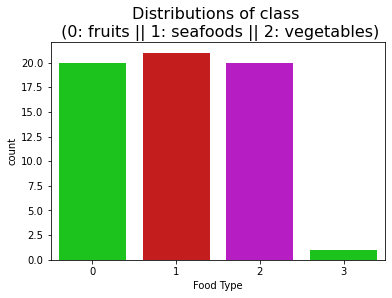

In [23]:
colors = ["#01DF01", "#DF0101", "#cd01df"]
sns.countplot('Food Type', data=data, palette=colors)
plt.title('Distributions of class \n (0: fruits || 1: seafoods || 2: vegetables)', fontsize=16)

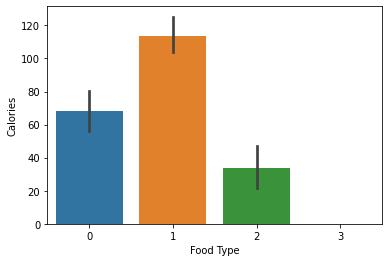

In [24]:
sns.barplot(x="Food Type",y="Calories",data=data)
plt.show()

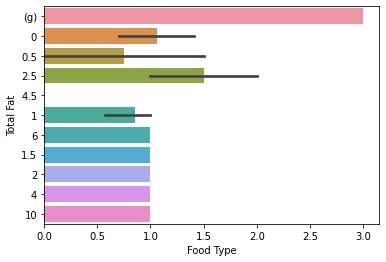

In [25]:
sns.barplot(x="Food Type",y="Total Fat",data=data)
plt.show()

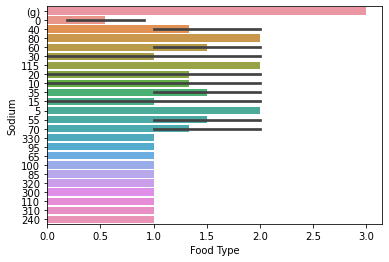

In [26]:
sns.barplot(x="Food Type",y="Sodium",data=data)
plt.show()

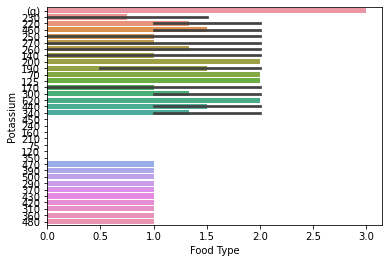

In [27]:
sns.barplot(x="Food Type",y="Potassium",data=data)
plt.show()

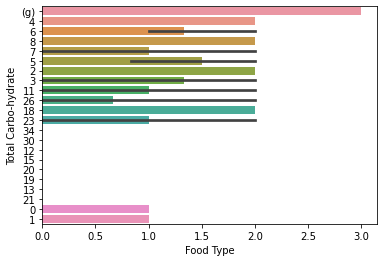

In [28]:
sns.barplot(x="Food Type",y="Total Carbo-hydrate",data=data)
plt.show()

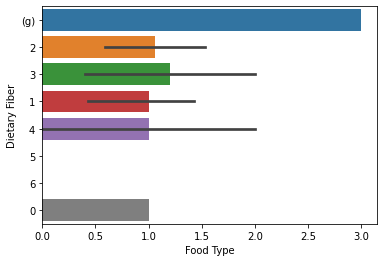

In [29]:
sns.barplot(x="Food Type",y="Dietary Fiber",data=data)
plt.show()

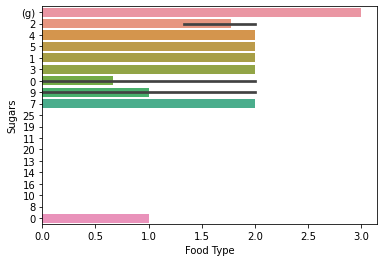

In [30]:
sns.barplot(x="Food Type",y="Sugars",data=data)
plt.show()

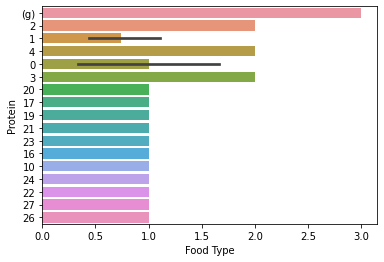

In [31]:
sns.barplot(x="Food Type",y="Protein",data=data)
plt.show()

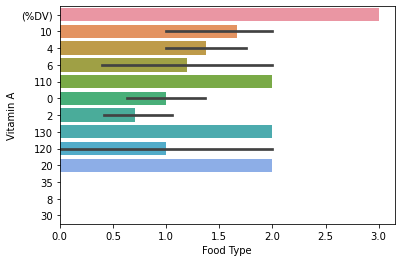

In [32]:
sns.barplot(x="Food Type",y="Vitamin A",data=data)
plt.show()

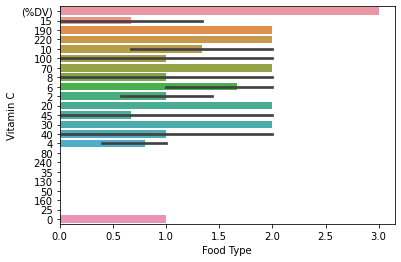

In [33]:
sns.barplot(x="Food Type",y="Vitamin C",data=data)
plt.show()

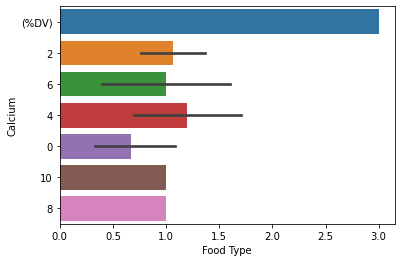

In [34]:
sns.barplot(x="Food Type",y="Calcium",data=data)
plt.show()

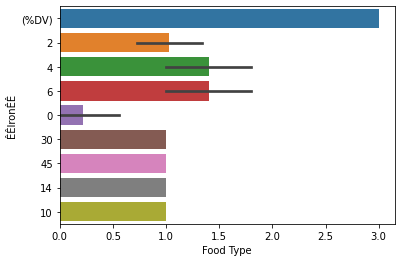

In [35]:
sns.barplot(x="Food Type",y="ÊÊIronÊÊ",data=data)
plt.show()

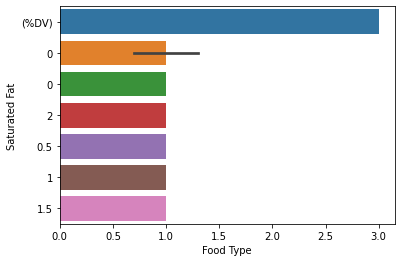

In [36]:
sns.barplot(x="Food Type",y="Saturated Fat",data=data)
plt.show()

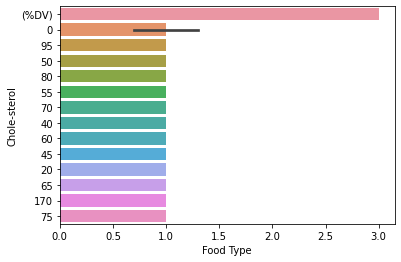

In [37]:
sns.barplot(x="Food Type",y="Chole-sterol",data=data)
plt.show()

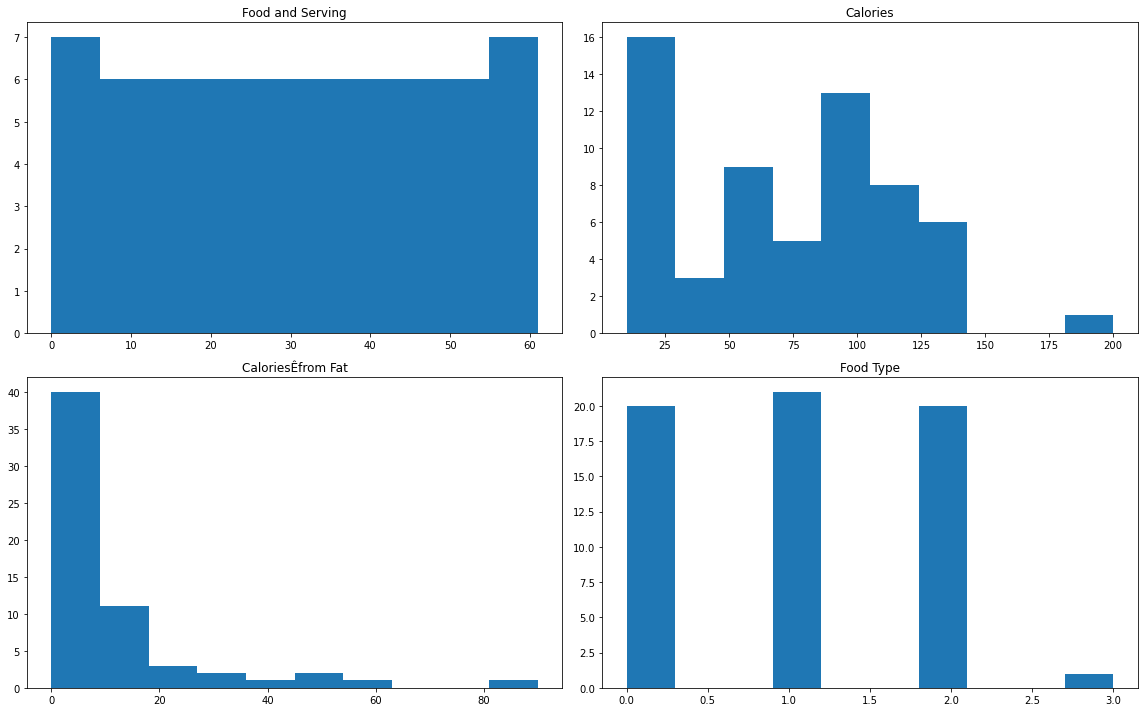

In [38]:
data.hist(figsize=(16,10), grid=False)
plt.tight_layout()

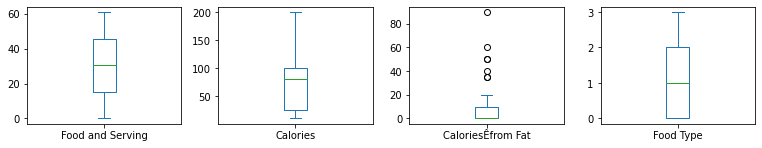

In [39]:
data.plot.box(subplots=True, sharey=False, layout=(6,6), figsize=(16,12))
plt.tight_layout()

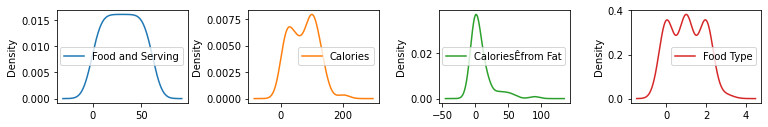

In [40]:
data.plot.kde(subplots=True, sharex=False, layout=(6,6), figsize=(16,10))
plt.tight_layout()

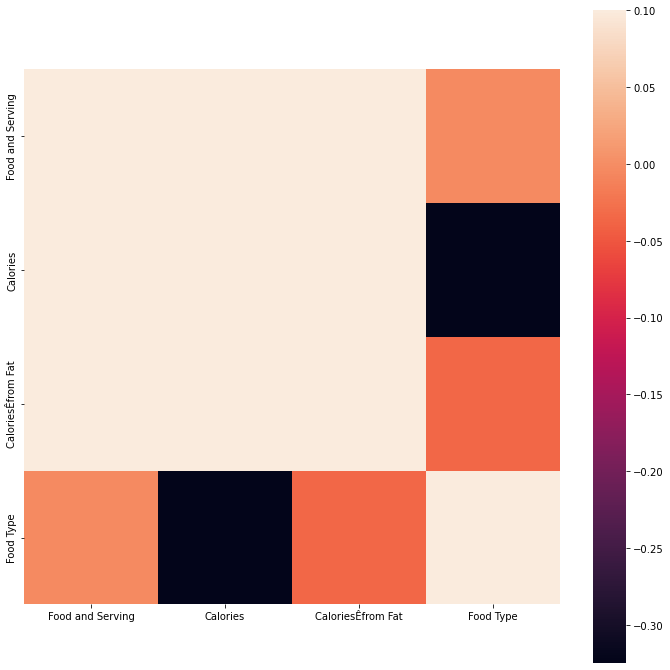

In [41]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 12))
sns.heatmap(corrmat, vmax = .10, square = True)
plt.show()

In [42]:
feature_names = data.iloc[:, 1:23].columns
target = data.iloc[:1, 23:].columns

data_features = data[feature_names]
data_target = data[target]

In [43]:
feature_names

Index(['Calories', 'CaloriesÊfrom Fat', 'Total Fat', 'Total Fat.1', 'Sodium',
       'Sodium.1', 'Potassium', 'Potassium.1', 'Total Carbo-hydrate',
       'Total Carbo-hydrate.1', 'Dietary Fiber', 'Dietary Fiber.1', 'Sugars',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'ÊÊIronÊÊ',
       'Saturated Fat', 'Saturated Fat.1', 'Chole-sterol', 'Chole-sterol.1'],
      dtype='object')

In [44]:
target

Index(['Food Type'], dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size = 0.80, test_size = 0.20, random_state = 1)

In [46]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report, plot_roc_curve


In [47]:
''''from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('Classfication Report:\n',classification_report(y_test,y_pred_lr))
F,ax = plt.subplots(1,2, figsize=(10,6))
plot_confusion_matrix(lr, X_test,y_test, cmap='Blues', ax=ax[0])'''

"'from sklearn.linear_model import LogisticRegression\nlr = LogisticRegression()\nlr.fit(X_train,y_train)\ny_pred_lr = lr.predict(X_test)\nprint('Classfication Report:\n',classification_report(y_test,y_pred_lr))\nF,ax = plt.subplots(1,2, figsize=(10,6))\nplot_confusion_matrix(lr, X_test,y_test, cmap='Blues', ax=ax[0])"

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Hypertuning Parameters
log_param = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4,4,20),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000, 2500, 5000]
}

lr_results = accuracy_score(X_train, y_train)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
accuracy_score(y_test, y_pred_lr)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)

print('Classfication Report:\n',classification_report(y_test,y_pred_forest))

F,ax = plt.subplots(1,2, figsize=(10,6))
plot_confusion_matrix(forest, X_test,y_test, cmap='Blues', ax=ax[0])

In [ ]:
accuracy_score(y_test, y_pred_forest)